# Data Analysis with Pandas

### Authors

###### Noemi Benci
Bachelor's Degree in Statistics.

###### Federico Pirona 
Bachelor's Degree in Statistics.

## Introduction
This analysis focuses on the spread of SARS-CoV-2 in Italy. 
Data are dowloded from these repositories on GitHub
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json (Data by regions)
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json (Data by province)

The data are updated every day from February, 24 2020 to June, 17, 2020 by the Depatment of the Civil Protecition. 
Data regards some day-by-day counts about the amount of infected, of deaths, of recovered and other conditions.
It has a natural tree structure because for each region there are one or more provinces and each pair is recorded daily. 

The analysis starts visualizing variables and the structures of the two datasets. 
Then we show some useful graphical representation of the data. After that we provide some data manipulation to get data more handle. 
Finally we combine together the two datasets and use a hierarchical indexing to make the dataset more readable.

## Loading data

In [87]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
import seaborn as sns
sns.set()

In [2]:
with open('./dati/dati-json/dpc-covid19-ita-province.json') as f:
    d1 = json.load(f)

In [3]:
with open('./dati/dati-json/dpc-covid19-ita-regioni.json') as f:
    d2 = json.load(f)

### Visualize data as dictionary

In [4]:
d1[:2]

[{'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 69,
  'denominazione_provincia': 'Chieti',
  'sigla_provincia': 'CH',
  'lat': 42.35103167,
  'long': 14.16754574,
  'totale_casi': 0,
  'note_it': '',
  'note_en': ''},
 {'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 66,
  'denominazione_provincia': "L'Aquila",
  'sigla_provincia': 'AQ',
  'lat': 42.35122196,
  'long': 13.39843823,
  'totale_casi': 0,
  'note_it': '',
  'note_en': ''}]

In [5]:
d2[:2]

[{'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'lat': 42.35122196,
  'long': 13.39843823,
  'ricoverati_con_sintomi': 0,
  'terapia_intensiva': 0,
  'totale_ospedalizzati': 0,
  'isolamento_domiciliare': 0,
  'totale_positivi': 0,
  'variazione_totale_positivi': 0,
  'nuovi_positivi': 0,
  'dimessi_guariti': 0,
  'deceduti': 0,
  'totale_casi': 0,
  'tamponi': 5,
  'casi_testati': None,
  'note_it': '',
  'note_en': ''},
 {'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 17,
  'denominazione_regione': 'Basilicata',
  'lat': 40.63947052,
  'long': 15.80514834,
  'ricoverati_con_sintomi': 0,
  'terapia_intensiva': 0,
  'totale_ospedalizzati': 0,
  'isolamento_domiciliare': 0,
  'totale_positivi': 0,
  'variazione_totale_positivi': 0,
  'nuovi_positivi': 0,
  'dimessi_guariti': 0,
  'deceduti': 0,
  'totale_casi': 0,
  'tamponi': 0,
  'casi_testati': None,
  'note_it': '',
  'note_en': ''}]

### Visualize data as Pandas DataFrames

In [48]:
province = pd.DataFrame(d1)
province.sample(10)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
13726,2020-06-10T17:00:00,ITA,8,Emilia-Romagna,99,Rimini,RN,44.060901,12.565630,2165,,
8080,2020-04-27T17:00:00,ITA,15,Campania,64,Avellino,AV,40.914047,14.795288,440,,
3374,2020-03-21T17:00:00,ITA,7,Liguria,9,Savona,SV,44.307505,8.481109,173,,
7110,2020-04-19T17:00:00,ITA,1,Piemonte,6,Alessandria,AL,44.912974,8.615401,2783,,
11365,2020-05-22T17:00:00,ITA,19,Sicilia,994,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,
1848,2020-03-09T18:00:00,ITA,3,Lombardia,108,Monza e della Brianza,MB,45.584390,9.273582,64,,
9396,2020-05-07T17:00:00,ITA,3,Lombardia,97,Lecco,LC,45.855758,9.393392,2419,,
6895,2020-04-17T17:00:00,ITA,9,Toscana,52,Siena,SI,43.318164,11.331910,392,,
18,2020-02-24T18:00:00,ITA,15,Campania,61,Caserta,CE,41.074659,14.332405,0,,
495,2020-02-27T18:00:00,ITA,9,Toscana,52,Siena,SI,43.318164,11.331910,0,,


In [7]:
region = pd.DataFrame(d2)
region.sample(10)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
1926,2020-05-25T17:00:00,ITA,19,Sicilia,38.115697,13.362357,89,9,98,1335,1433,-20,4,1724,270,3427,135261,118208.0,,
1271,2020-04-24T17:00:00,ITA,14,Molise,41.557748,14.659161,19,1,20,180,200,2,3,67,20,287,4805,4718.0,,
66,2020-02-27T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,14,NaN,,
1067,2020-04-14T17:00:00,ITA,22,P.A. Trento,46.068935,11.121231,325,54,379,1703,2082,2,15,749,310,3141,18774,NaN,,
201,2020-03-04T17:00:00,ITA,1,Piemonte,45.073274,7.680687,26,13,39,43,82,26,26,0,0,82,543,NaN,,
2031,2020-05-30T17:00:00,ITA,19,Sicilia,38.115697,13.362357,67,7,74,925,999,-138,2,2170,273,3442,148871,127725.0,,
1406,2020-04-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,1012,114,1126,7021,8147,-222,135,8354,1459,17960,349227,206347.0,,
177,2020-03-03T18:00:00,ITA,3,Lombardia,45.466794,9.190347,698,167,865,461,1326,249,266,139,55,1520,9577,NaN,,
2368,2020-06-15T17:00:00,ITA,9,Toscana,43.769231,11.255889,31,16,47,442,489,-10,8,8611,1088,10188,293683,207371.0,,
56,2020-02-26T18:00:00,ITA,20,Sardegna,39.215312,9.110616,0,0,0,0,0,0,0,0,0,0,1,NaN,,


## First look to 'Province' Dataset
Let's discover some info about the available variables and their nature.

In [8]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 12 columns):
data                       14720 non-null object
stato                      14720 non-null object
codice_regione             14720 non-null int64
denominazione_regione      14720 non-null object
codice_provincia           14720 non-null int64
denominazione_provincia    14720 non-null object
sigla_provincia            14720 non-null object
lat                        14720 non-null float64
long                       14720 non-null float64
totale_casi                14720 non-null int64
note_it                    14720 non-null object
note_en                    14720 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 1.3+ MB


In [9]:
province.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note_it', 'note_en'],
      dtype='object')

In [10]:
province.describe(include='all')

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
count,14720,14720,14720.00000,14720,14720.000000,14720,14720,14720.000000,14720.000000,14720.000000,14720,14720
unique,115,1,NaN,21,NaN,108,108,NaN,NaN,NaN,6,6
top,2020-05-28T17:00:00,ITA,NaN,Lombardia,NaN,In fase di definizione/aggiornamento,,NaN,NaN,NaN,,
freq,128,14720,NaN,1495,NaN,2415,2415,NaN,NaN,NaN,14715,14715
mean,NaN,NaN,10.68750,NaN,207.523438,NaN,NaN,35.868843,10.112000,1159.016101,NaN,NaN
std,NaN,NaN,6.12744,NaN,347.394828,NaN,NaN,16.072070,5.097765,2405.002333,NaN,NaN
min,NaN,NaN,1.00000,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,5.75000,NaN,32.750000,NaN,NaN,38.848542,8.583304,34.000000,NaN,NaN
50%,NaN,NaN,10.00000,NaN,64.500000,NaN,NaN,42.609815,11.188560,341.000000,NaN,NaN
75%,NaN,NaN,16.00000,NaN,96.250000,NaN,NaN,44.947714,13.593962,1133.250000,NaN,NaN


The dataset of provinces is composed by 14 720 observations each composed by 12 variables. Each observation is a daily update of the count of cases of Coronavirus for a particular italian city and it provides all the information about the city (geographical location with longitude and latitude, which region does the city belong to) and the number of cases registred on a particular date. 

The dataset contains information of 115 different days for every region (21 unique regions) and province (107 provinces + 1 'In fase di aggiornamento') of Italy. 

On average have been registred 1159 cases per day, with a minimum of 0 and a maximum of about 24 000. 

##### Note that the latitude and the longitude reach as minumum 0. The rows with latitude and/or longitude have to be removed because wrong (each italian city has latitude and longitude different form 0).

In [11]:
province.shape

(14720, 12)

In [12]:
# identifying fake rows because of lat=0
province[province['lat']==0]

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.0,0.0,0,,
7,2020-02-24T18:00:00,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,,0.0,0.0,0,,
9,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,981,In fase di definizione/aggiornamento,,0.0,0.0,0,,
15,2020-02-24T18:00:00,ITA,18,Calabria,982,In fase di definizione/aggiornamento,,0.0,0.0,0,,
21,2020-02-24T18:00:00,ITA,15,Campania,983,In fase di definizione/aggiornamento,,0.0,0.0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
14704,2020-06-17T17:00:00,ITA,9,Toscana,995,In fase di definizione/aggiornamento,,0.0,0.0,0,,
14706,2020-06-17T17:00:00,ITA,22,P.A. Trento,996,In fase di definizione/aggiornamento,,0.0,0.0,0,,
14709,2020-06-17T17:00:00,ITA,10,Umbria,997,In fase di definizione/aggiornamento,,0.0,0.0,55,,
14711,2020-06-17T17:00:00,ITA,2,Valle d'Aosta,998,In fase di definizione/aggiornamento,,0.0,0.0,0,,


In [13]:
# identifying fake rows because of long=0
province[province['long']==0]

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.0,0.0,0,,
7,2020-02-24T18:00:00,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,,0.0,0.0,0,,
9,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,981,In fase di definizione/aggiornamento,,0.0,0.0,0,,
15,2020-02-24T18:00:00,ITA,18,Calabria,982,In fase di definizione/aggiornamento,,0.0,0.0,0,,
21,2020-02-24T18:00:00,ITA,15,Campania,983,In fase di definizione/aggiornamento,,0.0,0.0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
14704,2020-06-17T17:00:00,ITA,9,Toscana,995,In fase di definizione/aggiornamento,,0.0,0.0,0,,
14706,2020-06-17T17:00:00,ITA,22,P.A. Trento,996,In fase di definizione/aggiornamento,,0.0,0.0,0,,
14709,2020-06-17T17:00:00,ITA,10,Umbria,997,In fase di definizione/aggiornamento,,0.0,0.0,55,,
14711,2020-06-17T17:00:00,ITA,2,Valle d'Aosta,998,In fase di definizione/aggiornamento,,0.0,0.0,0,,


In [14]:
# before there were 14720 observation of which 2415 were fake. dropping the fake one we sould have 
province.shape[0] - province[province['long']==0].shape[0]

12305

In [19]:
# same rows with lat=0 and long=0, let's exclude them
province = province.drop(province[province['lat']==0].index)

In [20]:
# let's verify the shape of the clean dataset
province.shape

(12305, 12)

## First look to 'Regions' Dataset

In [21]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 20 columns):
data                          2415 non-null object
stato                         2415 non-null object
codice_regione                2415 non-null int64
denominazione_regione         2415 non-null object
lat                           2415 non-null float64
long                          2415 non-null float64
ricoverati_con_sintomi        2415 non-null int64
terapia_intensiva             2415 non-null int64
totale_ospedalizzati          2415 non-null int64
isolamento_domiciliare        2415 non-null int64
totale_positivi               2415 non-null int64
variazione_totale_positivi    2415 non-null int64
nuovi_positivi                2415 non-null int64
dimessi_guariti               2415 non-null int64
deceduti                      2415 non-null int64
totale_casi                   2415 non-null int64
tamponi                       2415 non-null int64
casi_testati                  1260 n

In [22]:
region.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it',
       'note_en'],
      dtype='object')

In [23]:
region.describe(include='all')

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
count,2415,2415,2415.000000,2415,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,1260.000000,2415,2415
unique,115,1,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,44
top,2020-03-29T17:00:00,ITA,NaN,Molise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
freq,21,2415,NaN,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2372,2372
mean,NaN,NaN,11.857143,NaN,43.046293,12.225955,661.626501,75.839337,737.465839,2060.233540,2797.699379,9.815321,98.477433,3309.270807,957.603727,7064.573913,85544.734990,93820.026984,NaN,NaN
std,NaN,NaN,6.275098,NaN,2.489296,2.659498,1603.884235,169.204765,1766.756690,4164.175468,5654.196069,226.519785,242.944880,7714.324937,2585.413095,14755.994394,140159.019098,96278.625276,NaN,NaN
min,NaN,NaN,1.000000,NaN,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-5339.000000,-229.000000,0.000000,0.000000,0.000000,0.000000,3482.000000,NaN,NaN
25%,NaN,NaN,7.000000,NaN,41.125596,11.121231,28.000000,2.000000,34.000000,105.000000,151.000000,-26.000000,2.000000,30.000000,23.000000,431.500000,5185.000000,30495.750000,NaN,NaN
50%,NaN,NaN,12.000000,NaN,43.616760,12.388247,127.000000,17.000000,145.000000,621.000000,814.000000,0.000000,16.000000,687.000000,182.000000,2348.000000,33152.000000,56826.500000,NaN,NaN
75%,NaN,NaN,17.000000,NaN,45.434905,13.768136,526.000000,72.000000,604.000000,1965.000000,2678.500000,32.000000,80.000000,2472.500000,542.500000,6012.500000,97437.000000,125414.000000,NaN,NaN


The dataset of Regions contains 2415 rows and 20 variables each. Every observation is an update of some numbers about the spread of Coronavirus in Italy. 
For 115 days and for all italian regions we have:
- number of hospitalized with sympthoms (on average 661 per day, with minimum 0 and maximum of about 12 100);
- number of people in intensive care unit (on average 75 per day, with minimum 0 and maximum of about 1 400);
- total number of hospitalized (on average 737 per day, with minimum 0 and maximum 13 400);
- number of people house-isolated (on average 2 100 per day, with minimum 0 and maximum of about 30 400);
- number of tested positive  (on average 2 800 per day, with minimum 0 and maximum of about 37 300);
- variation of new tested positive (on average 9 per day, with minimum 0 and maximum of about 1 950);
- number of new tested positive (on average 98 per day, with minimum 0 and maximum of about 3 250);
- number discharged healed (on average 3 300 per day, with a minimum of 0 and a maximum of about 60 850);
- number of deaths (on average 950 per day, with a minimum of 0 and a maximum of about 16 500);
- number of total cases (on average 7 100 per day, with a minimum of 0 and a mamimum of about 92 300);
- number of swabs (on average 85 500 per day, with a minimum of 0 and a maximum of about 917 900);
- number of tested cases (on average 93 800 per day, with a minimum of 3 500 and a maximum of about 547 100).

This dataset can be integrated with the province dataset to integrate the information about the number of cases within the cities of a region.

## Some Graphical Representations

First it is necessary to trasform the date in a 'datetime' object.

In [24]:
display(region['data'][0], province['data'][0])   # check the date format

'2020-02-24T18:00:00'

'2020-02-24T18:00:00'

In [53]:
# add new date as datetime object
region['date'] = [datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").date() for x in region['data']] 
province['date'] = [datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").date() for x in province['data']] 

In [55]:
region['date']

0       2020-02-24
1       2020-02-24
2       2020-02-24
3       2020-02-24
4       2020-02-24
           ...    
2410    2020-06-17
2411    2020-06-17
2412    2020-06-17
2413    2020-06-17
2414    2020-06-17
Name: date, Length: 2415, dtype: object

We add population data from Istat (January, 1, 2020) http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1.

In [159]:
pop = pd.read_csv('population.csv')
pop.head()

,Provincia,Reg,Popolazione
0,RM\nCittà Metropolitana di\nROMA CAPITALE,LAZ,4.342.212
1,MI\nCittà Metropolitana di\nMILANO,LOM,3.250.315
2,NA\nCittà Metropolitana di\nNAPOLI,CAM,3.084.890
3,TO\nCittà Metropolitana di\nTORINO,PIE,2.259.523
4,BS\nBrescia,LOM,1.265.954


In [160]:
popolazione = []
for p in pop['Popolazione']:
    popolazione.append(int(p.replace('.', '')))
popolazione
pop['popolazione'] = popolazione

In [161]:
pop.head()

,Provincia,Reg,Popolazione,popolazione
0,RM\nCittà Metropolitana di\nROMA CAPITALE,LAZ,4.342.212,4342212
1,MI\nCittà Metropolitana di\nMILANO,LOM,3.250.315,3250315
2,NA\nCittà Metropolitana di\nNAPOLI,CAM,3.084.890,3084890
3,TO\nCittà Metropolitana di\nTORINO,PIE,2.259.523,2259523
4,BS\nBrescia,LOM,1.265.954,1265954


In [162]:
prov = []
for i in pop.index:
    prov.append(pop.Provincia[i][:2])

In [163]:
df_pop_prov = pd.DataFrame({'pop': pop.popolazione, 'prov': prov}, columns=['prov', 'pop'])

df_pop_prov

,prov,pop
0,RM,4342212
1,MI,3250315
2,NA,3084890
3,TO,2259523
4,BS,1265954
...,...,...
102,OR,157707
103,RI,155503
104,GO,139403
105,AO,125666


In [164]:
df_pop_reg =  pd.DataFrame(pop.groupby('Reg')['popolazione'].sum())
df_pop_reg

,popolazione
Reg,
ABR,1311580
BAS,234405
BOL,531178
CAL,1789649
CAM,5801692
EMR,4459477
FVG,1215220
LAZ,5593755
LIG,601122


In [165]:
df_pop_reg.index

Index(['ABR', 'BAS', 'BOL', 'CAL', 'CAM', 'EMR', 'FVG', 'LAZ', 'LIG', 'LOM',
       'MAR', 'MOL', 'PIE', 'PUG', 'SAR', 'SIC', 'TAA', 'TOS', 'UMB', 'VDA',
       'VEN'],
      dtype='object', name='Reg')

In [158]:
region['denominazione_regione'].unique()

array(['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
       'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [176]:
reg_abbrv = {'ABR': 'Abruzzo','BAS': 'Basilicata','BOL': 'P.A. Bolzano','CAL': 'Calabria','CAM': 'Campania',
       'EMR': 'Emilia-Romagna','FVG': 'Friuli Venezia Giulia','LAZ': 'Lazio','LIG': 'Liguria',
       'LOM': 'Lombardia' ,'MAR': 'Marche','MOL': 'Molise','PIE': 'Piemonte','PUG': 'Puglia','SAR': 'Sardegna',
       'SIC':'Sicilia','TOS': 'Toscana','TAA': 'P.A. Trento','UMB': 'Umbria','VDA': "Valle d'Aosta",
       'VEN': 'Veneto'}    

In [180]:
regione = []
for i in df_pop_reg.index:
    regione.append(reg_abbrv[i])
df_pop_reg['denominazione_regione'] = regione


In [183]:
df_pop_reg

,popolazione,regione,denominazione_regione
Reg,,,
ABR,1311580,Abruzzo,Abruzzo
BAS,234405,Basilicata,Basilicata
BOL,531178,P.A. Bolzano,P.A. Bolzano
CAL,1789649,Calabria,Calabria
CAM,5801692,Campania,Campania
EMR,4459477,Emilia-Romagna,Emilia-Romagna
FVG,1215220,Friuli Venezia Giulia,Friuli Venezia Giulia
LAZ,5593755,Lazio,Lazio
LIG,601122,Liguria,Liguria


In [184]:
df = df.join(df_pop_reg, region, on='denominazione_regione')

TypeError: join() got multiple values for argument 'on'

In [155]:
region.


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en,date
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,0,5,NaN,,,2020-02-24
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,0,0,NaN,,,2020-02-24
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,...,0,0,0,0,0,1,NaN,,,2020-02-24
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,0,1,NaN,,,2020-02-24
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,0,10,NaN,,,2020-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,2020-06-17T17:00:00,ITA,9,Toscana,43.769231,11.255889,33,14,47,397,...,-19,2,8657,1092,10193,300612,212090.0,,,2020-06-17
2411,2020-06-17T17:00:00,ITA,22,P.A. Trento,46.068935,11.121231,2,0,2,56,...,-6,1,3926,465,4449,105841,56032.0,,,2020-06-17
2412,2020-06-17T17:00:00,ITA,10,Umbria,43.106758,12.388247,7,2,9,9,...,0,0,1342,77,1437,84511,59407.0,,,2020-06-17
2413,2020-06-17T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,5,0,5,3,...,-2,0,1039,144,1191,16918,12996.0,,,2020-06-17


### Number of total cases and deaths during the time.
 No distincions between regions or cities.

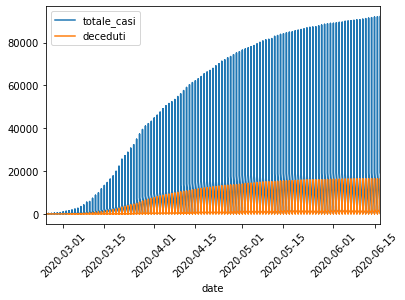

In [58]:
region.plot(y=['totale_casi', 'deceduti'], x='date', rot=45);  

From the plot we see that the number of people infected by the Covid-19 has increased very rapidly in the first month (from the 1st of March to the first of April) and that it has continued increasing quite rapidely. The number of deaths has increased in the fist two months but now it seems quite constant.

### Time series of the counts provided
Distinction by regions

In [27]:
regions_names = region['denominazione_regione'].unique() 

# define the figure size and grid layout properties
figsize = (20, 40)
cols = 2
rows = len(regions_names) // cols + 1

def trim_axs(axs, N):
    """ Reduce *axs* to *N* Axes. 
    All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

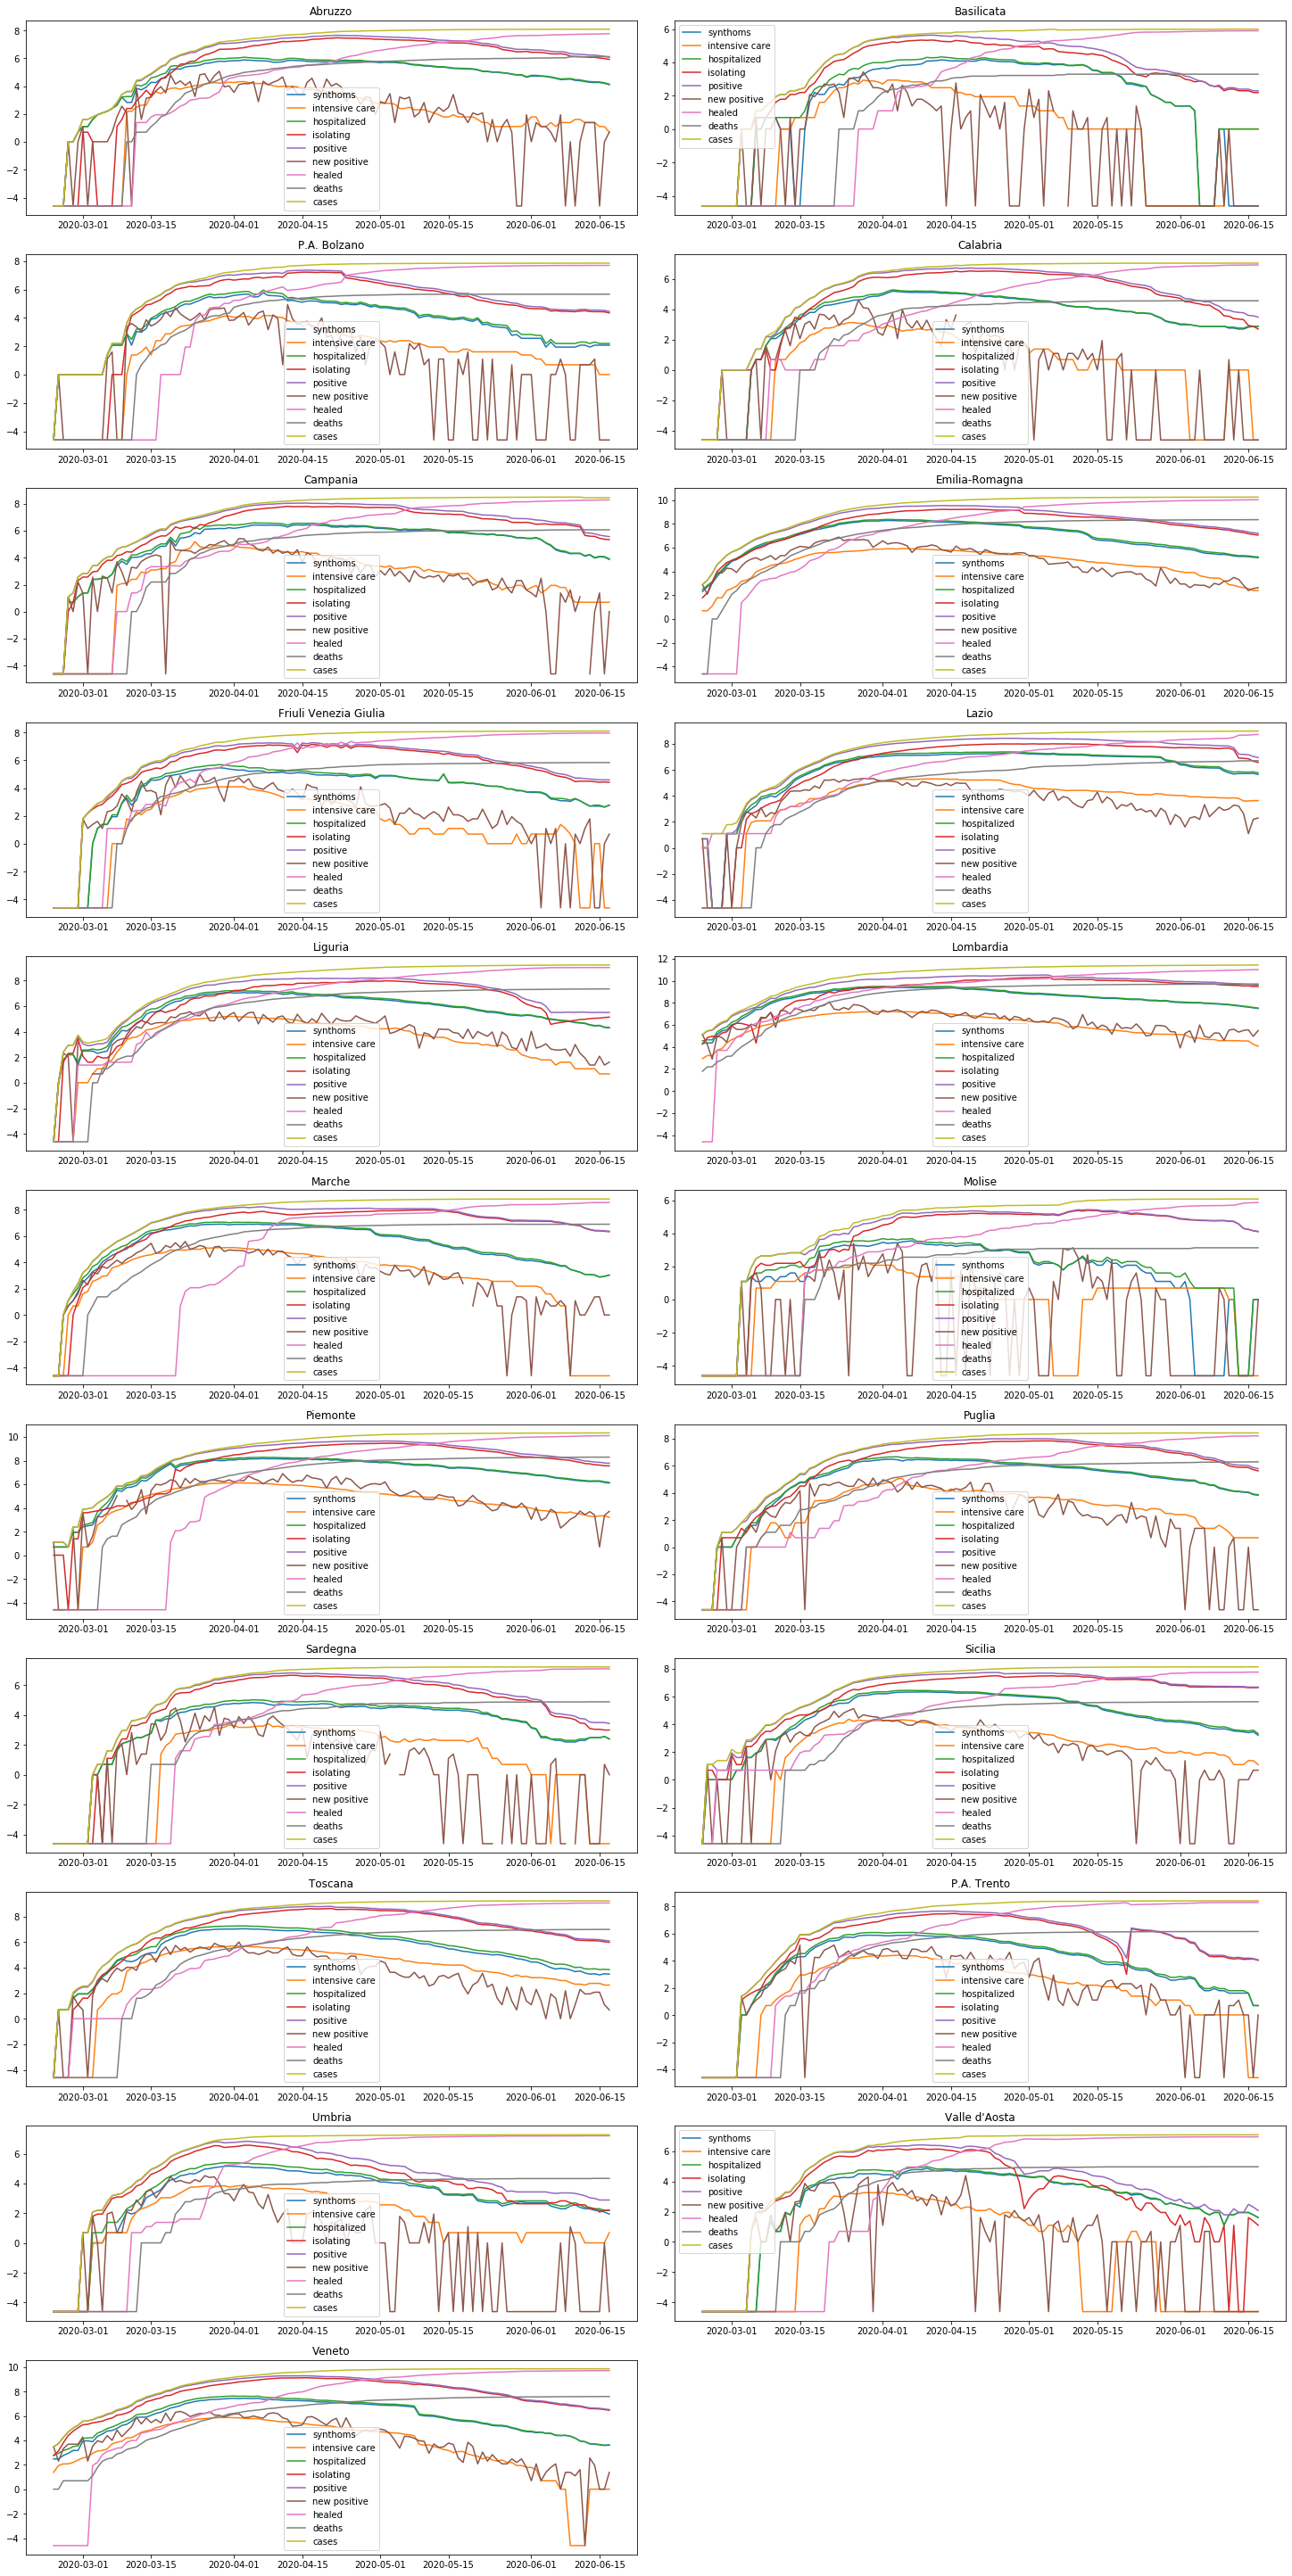

In [64]:
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(regions_names))
for ax, reg in zip(axs, regions_names):
    ax.set_title(str(reg))
    df_r = region[region['denominazione_regione']==reg]
    ax.plot(df_r['date'], np.log(df_r['ricoverati_con_sintomi']+0.01), label='synthoms')
    ax.plot(df_r['date'], np.log(df_r['terapia_intensiva']+0.01), label='intensive care')     
    ax.plot(df_r['date'], np.log(df_r['totale_ospedalizzati']+0.01), label='hospitalized')   
    ax.plot(df_r['date'], np.log(df_r['isolamento_domiciliare']+0.01), label='isolating')
    ax.plot(df_r['date'], np.log(df_r['totale_positivi']+0.01), label='positive')
    ax.plot(df_r['date'], np.log(df_r['nuovi_positivi']+0.01), label='new positive')
    ax.plot(df_r['date'], np.log(df_r['dimessi_guariti']+0.01), label='healed')
    ax.plot(df_r['date'], np.log(df_r['deceduti']+0.01), label='deaths')
    ax.plot(df_r['date'], np.log(df_r['totale_casi']+0.01), label='cases')    
    ax.legend()

Let's repeat the same plot as before fixing the ylim to analyze differences by regions.

/home/noe/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


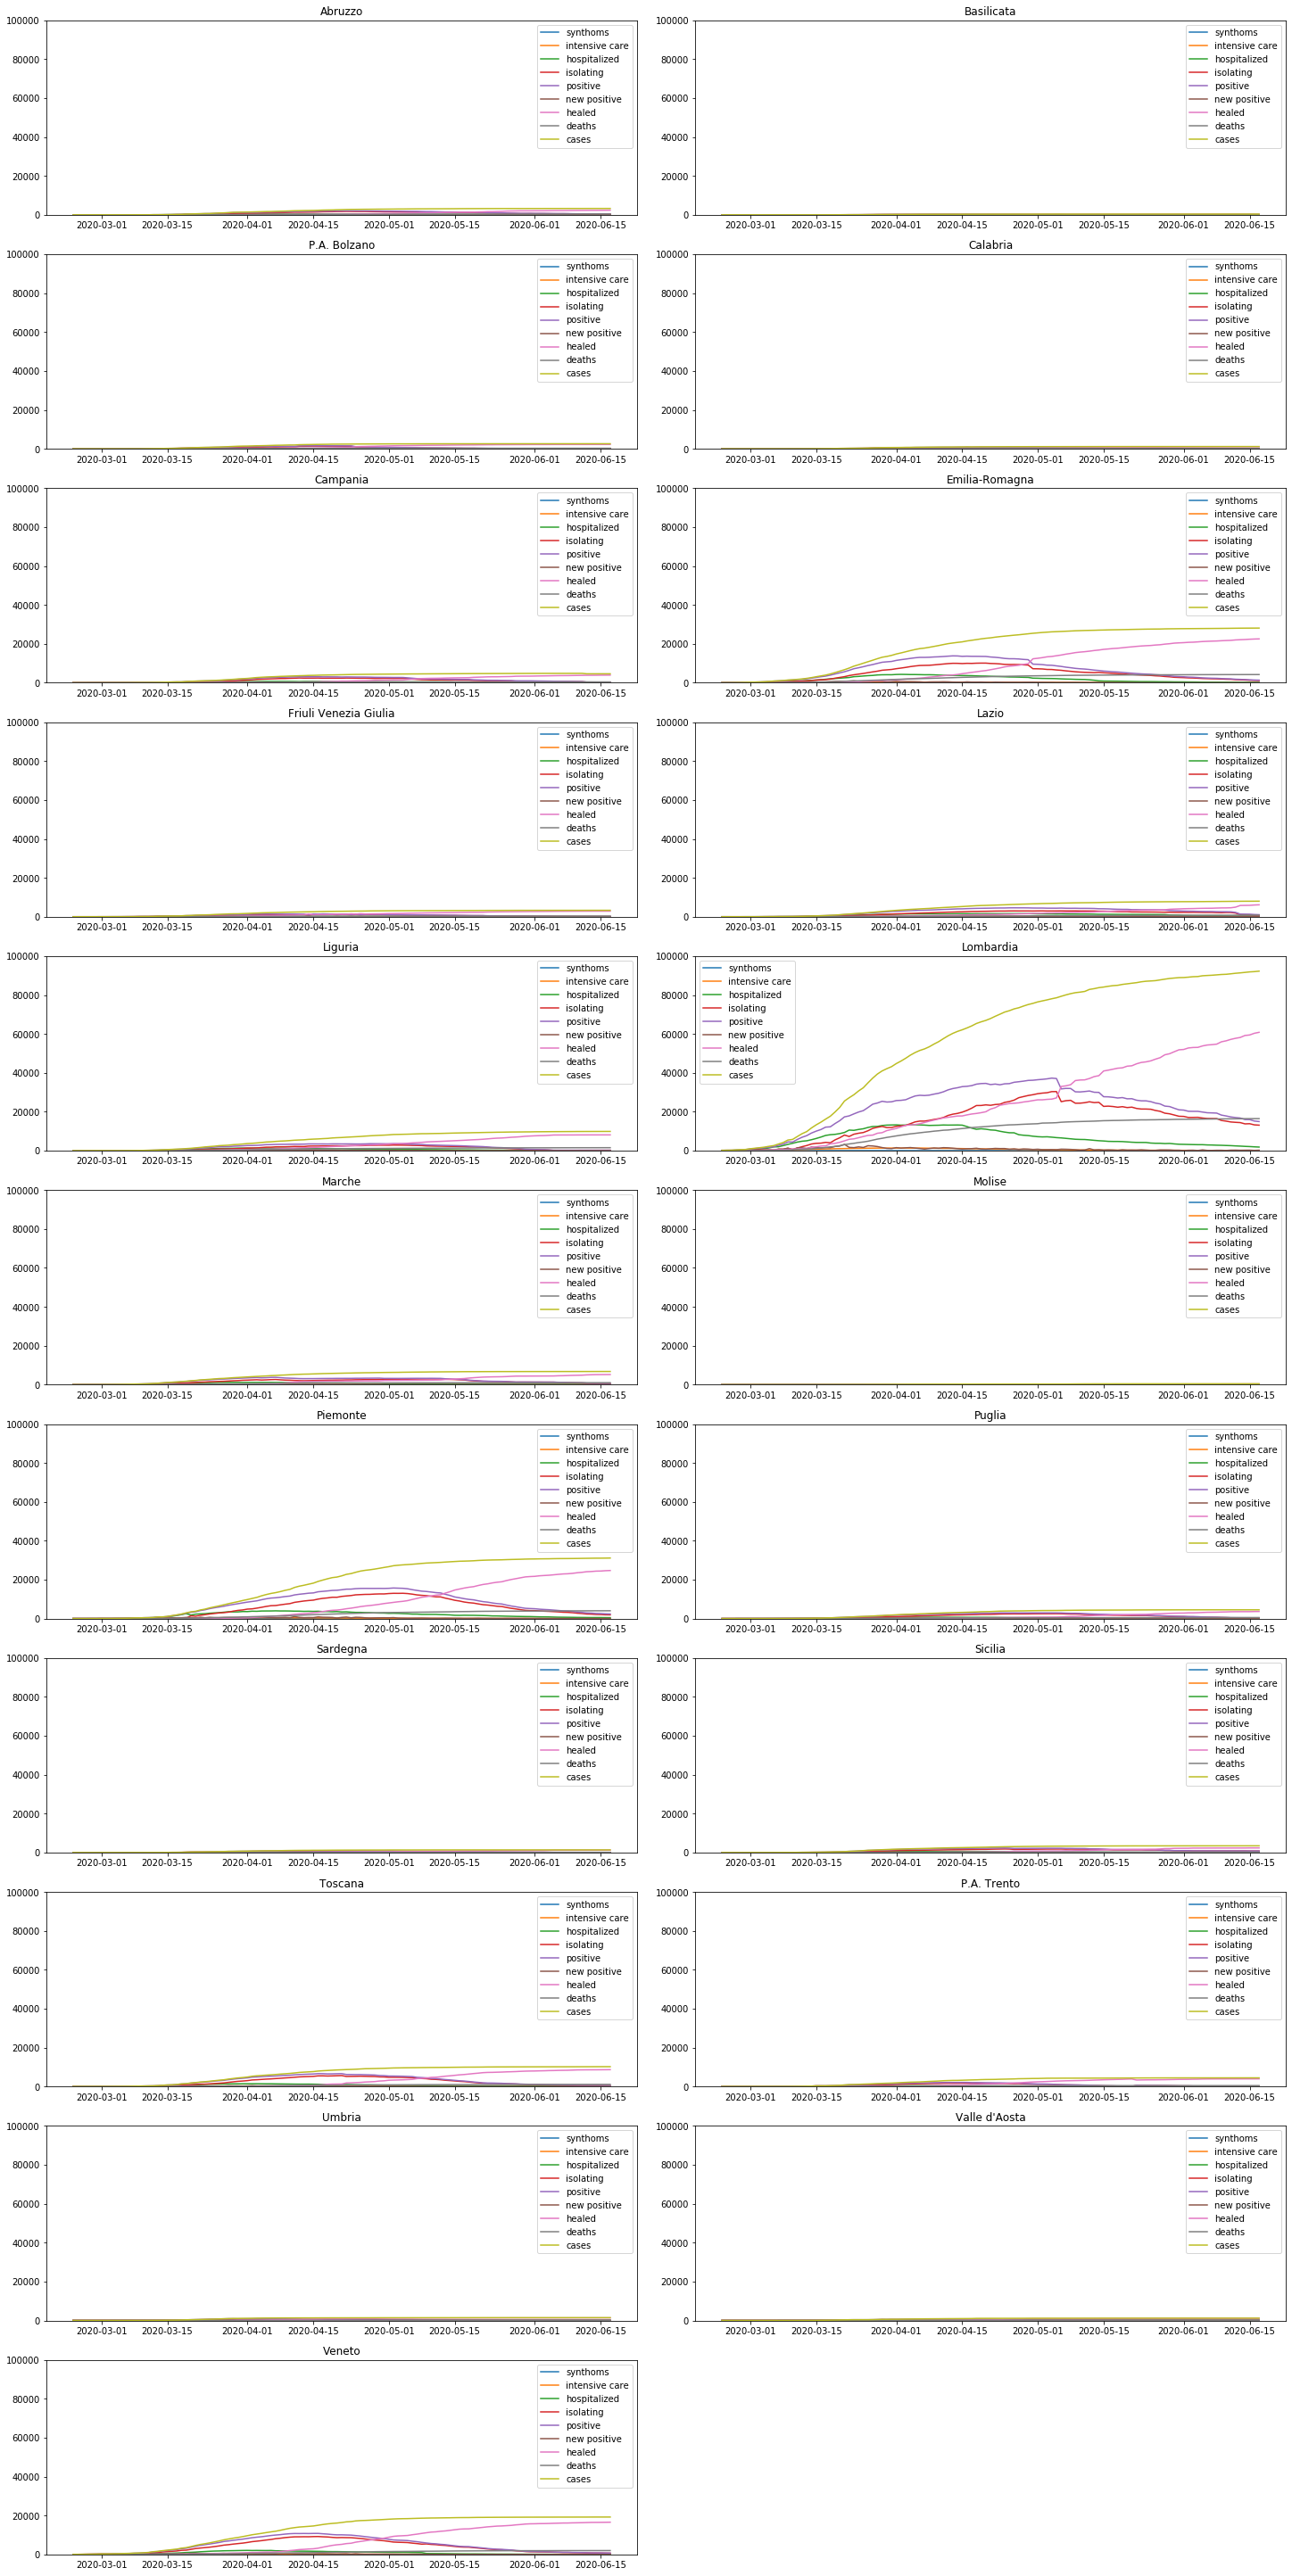

In [60]:
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(regions_names))
for ax, case in zip(axs, regions_names):
    ax.set_title(str(case))
    df_r = region[region['denominazione_regione']==case]
    ax.set_ylim((0, 100000))
    ax.plot(df_r['date'], df_r['ricoverati_con_sintomi'], label='synthoms')
    ax.plot(df_r['date'], df_r['terapia_intensiva'], label='intensive care')     
    ax.plot(df_r['date'], df_r['totale_ospedalizzati'], label='hospitalized')   
    ax.plot(df_r['date'], df_r['isolamento_domiciliare'], label='isolating')
    ax.plot(df_r['date'], df_r['totale_positivi'], label='positive')
    ax.plot(df_r['date'], df_r['nuovi_positivi'], label='new positive')
    ax.plot(df_r['date'], df_r['dimessi_guariti'], label='healed')
    ax.plot(df_r['date'], df_r['deceduti'], label='deaths')
    ax.plot(df_r['date'], df_r['totale_casi'], label='cases')    
    ax.legend()

As we can see most of the lines of the plot can be barely seen. This is because Lombardy has very higher values for quite all the counts evaluated. 
Form the plots we can say that the regions in which we find high values (apart from Lombardy) are Veneto, Piedmont and Emilia-Romagna.

### Obtain average counts by regions

In [69]:
df = pd.DataFrame(region.groupby('denominazione_regione')['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati'].mean()
df

SyntaxError: invalid syntax (<ipython-input-69-45ff190972ff>, line 5)

# Questi grafici sono brutti ma non so come 'abbellirli'

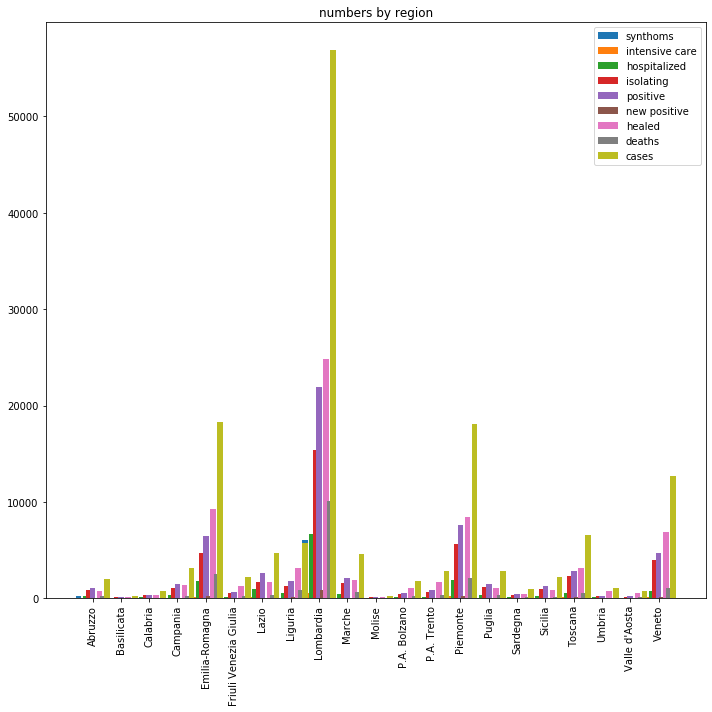

In [31]:
labels = df.index

x = np.arange(0, 21*4, step = 4)  # the label locations

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x-2, df['ricoverati_con_sintomi'], label='synthoms')
ax.bar(x-1.5, df['terapia_intensiva'], label='intensive care')     
ax.bar(x-1, df['totale_ospedalizzati'], label='hospitalized')   
ax.bar(x-0.5, df['isolamento_domiciliare'], label='isolating')
ax.bar(x, df['totale_positivi'], label='positive')
ax.bar(x+0.5, df['nuovi_positivi'], label='new positive')
ax.bar(x+1, df['dimessi_guariti'], label='healed')
ax.bar(x+1.5, df['deceduti'], label='deaths')
ax.bar(x+2, df['totale_casi'], label='cases')  

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('numbers by region')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show();

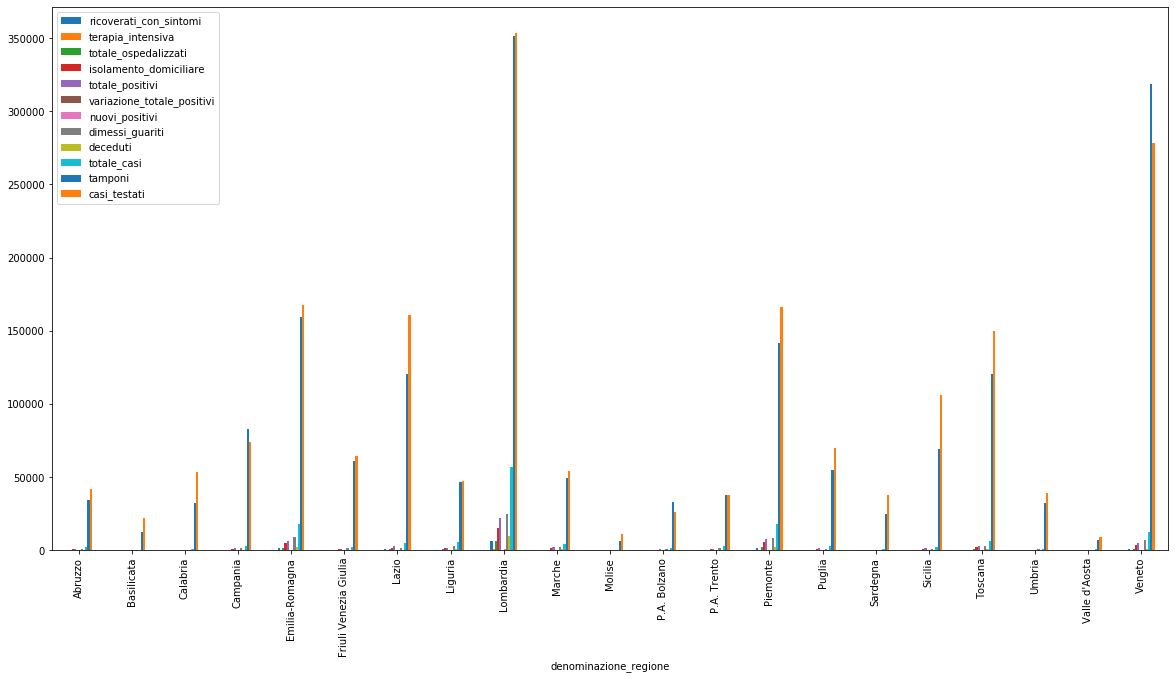

In [32]:
df.plot.bar(figsize=(20,10));

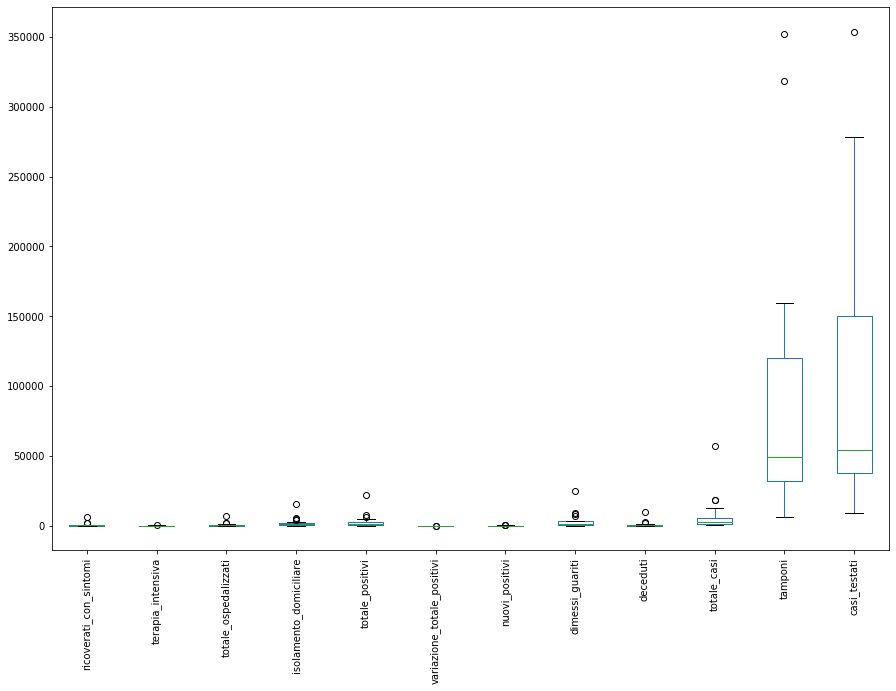

In [34]:
df.plot.box(figsize=(15,10), rot=90);

### Italian scatterplot of cases
Let's use the latitude and longitude

In [35]:
# be sure that longitude and latitude do not change 
df_1 = region.groupby('denominazione_regione')['lat', 'long']
df_1.head()

,lat,long
0,42.351222,13.398438
1,40.639471,15.805148
2,46.499335,11.356624
3,38.905976,16.594402
4,40.839566,14.250850
...,...,...
100,43.769231,11.255889
101,46.068935,11.121231
102,43.106758,12.388247
103,45.737503,7.320149


In [36]:
# build an aggregated dataset in which we consider also the latitude and longitude
d = pd.DataFrame(region.groupby('denominazione_regione')['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'lat', 'long'].mean())


In [37]:
d['lat'] # see if it works

denominazione_regione
Abruzzo                  42.351222
Basilicata               40.639471
Calabria                 38.905976
Campania                 40.839566
Emilia-Romagna           44.494367
Friuli Venezia Giulia    45.649435
Lazio                    41.892770
Liguria                  44.411493
Lombardia                45.466794
Marche                   43.616760
Molise                   41.557748
P.A. Bolzano             46.499335
P.A. Trento              46.068935
Piemonte                 45.073274
Puglia                   41.125596
Sardegna                 39.215312
Sicilia                  38.115697
Toscana                  43.769231
Umbria                   43.106758
Valle d'Aosta            45.737503
Veneto                   45.434905
Name: lat, dtype: float64

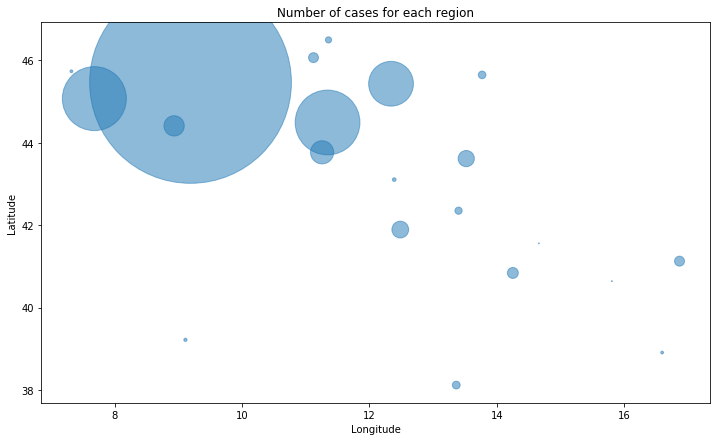

In [83]:
# total cases by position
lat = d['lat']
long = d['long']
area = np.pi * (d['totale_casi']/500)**2 # dimension of the point

fig = plt.figure(figsize=(12,7))
plt.scatter(long, lat, s=area, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Number of cases for each region');

In the figure we exploit the position of each region (with latitude and longitude) to build a sort of Italy-shaped scatterplot. The dimension of each point is proportional to the number of cases registred in each region.

### Pie-plot of the contribution of every region in the main tallies

In [39]:
# new df including only some tally
dd = pd.DataFrame(region.groupby('denominazione_regione')['ricoverati_con_sintomi', 'terapia_intensiva',
       'isolamento_domiciliare', 'totale_positivi',
       'dimessi_guariti','deceduti', 'totale_casi', 'tamponi'].mean())


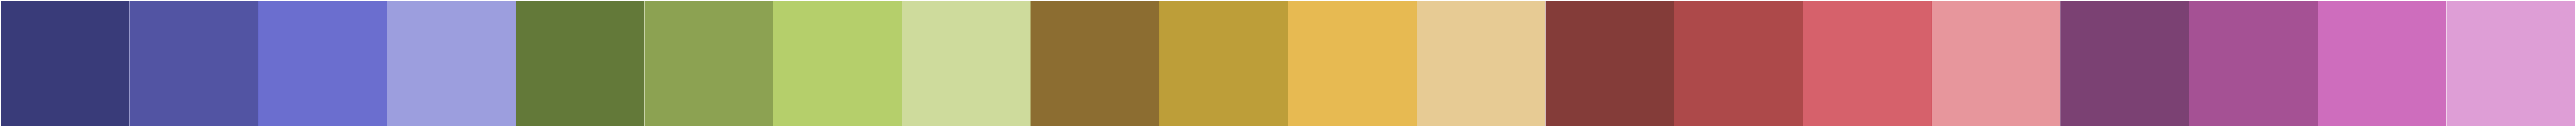

In [91]:
sns.palplot(sns.color_palette("tab20b"), 21)

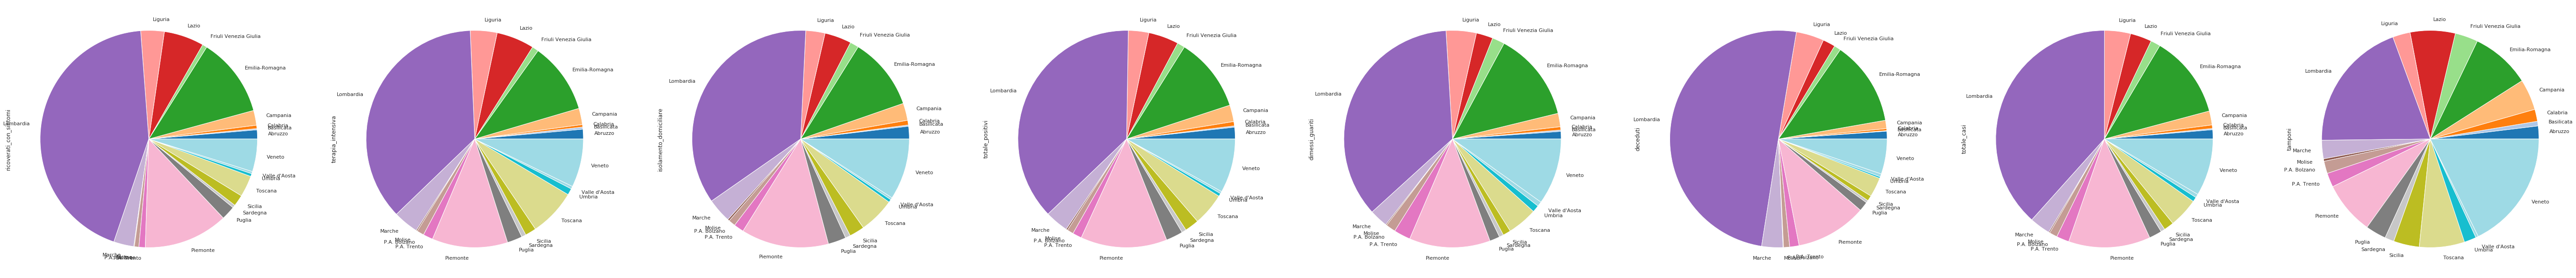

In [97]:
dd.plot.pie(subplots=True, figsize=(100,100), legend=False, colormap = "tab20");
#click on the image to zoom

In every pie plot comes out that Lombardy is the italian region that the most has benn dameged by Covid-19.
The majority of hospitalized, deaths and positive cases have been registred in Lombardy with a huge difference from the other regions. 

Instead, the number of swaps in Lombardy is not as highly different as before. Veneto seem to have the same number of swaps as the Lombardy.

## Merging the two data sets
In order to make the analysis more interesting, we can merge the two datasets (regions and province) to build one hierarchical DataFrame.


#### Some tries: try to merge a subset of the two dataset

In [41]:
r = region[:5]
p = province[:5]
display(r, p)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en,date
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,0,5,NaN,,,2020-02-24 18:00:00
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,0,0,NaN,,,2020-02-24 18:00:00
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,...,0,0,0,0,0,1,NaN,,,2020-02-24 18:00:00
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,0,1,NaN,,,2020-02-24 18:00:00
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,0,10,NaN,,,2020-02-24 18:00:00


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,date
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,2020-02-24 18:00:00
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,,2020-02-24 18:00:00
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,,2020-02-24 18:00:00
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,,2020-02-24 18:00:00
5,2020-02-24T18:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,0,,,2020-02-24 18:00:00


In [42]:
t = pd.merge(r, p)
t

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en,date,codice_provincia,denominazione_provincia,sigla_provincia
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,5,NaN,,,2020-02-24 18:00:00,66,L'Aquila,AQ


In [43]:
t = pd.merge(r, p, how='outer')
t

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en,date,codice_provincia,denominazione_provincia,sigla_provincia
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0.0,0.0,0.0,0.0,...,0.0,0,5.0,NaN,,,2020-02-24 18:00:00,66.0,L'Aquila,AQ
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0.0,0.0,0.0,0.0,...,0.0,0,0.0,NaN,,,2020-02-24 18:00:00,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0.0,0.0,0.0,0.0,...,0.0,0,1.0,NaN,,,2020-02-24 18:00:00,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0.0,0.0,0.0,0.0,...,0.0,0,1.0,NaN,,,2020-02-24 18:00:00,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0.0,0.0,0.0,0.0,...,0.0,0,10.0,NaN,,,2020-02-24 18:00:00,NaN,NaN,NaN
5,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351032,14.167546,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,,,2020-02-24 18:00:00,69.0,Chieti,CH
6,2020-02-24T18:00:00,ITA,13,Abruzzo,42.464584,14.213648,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,,,2020-02-24 18:00:00,68.0,Pescara,PE
7,2020-02-24T18:00:00,ITA,13,Abruzzo,42.658918,13.704400,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,,,2020-02-24 18:00:00,67.0,Teramo,TE
8,2020-02-24T18:00:00,ITA,17,Basilicata,40.667512,16.597924,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,,,2020-02-24 18:00:00,77.0,Matera,MT


In [158]:
t = pd.merge(r, p, )
t

,data_x,stato_x,codice_regione_x,denominazione_regione,lat_x,long_x,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,stato_y,codice_regione_y,codice_provincia,denominazione_provincia,sigla_provincia,lat_y,long_y,totale_casi_y,note_it_y,note_en_y
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,ITA,13,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,ITA,13,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,ITA,13,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,ITA,13,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,ITA,17,77,Matera,MT,40.667512,16.597924,0,,


### True dataset

In [123]:
total = 

In [125]:
province.loc[province.denominazione_regione=='Toscana', 'sigla_provincia'].unique()

array(['AR', 'FI', 'GR', 'LI', 'LU', 'MS', 'PI', 'PT', 'PO', 'SI'],
      dtype=object)

In [126]:
toscana = province.loc[province.denominazione_regione=='Toscana']
toscana.loc[province.sigla_provincia=='AR', 'date'].unique()

array(['2020-02-24T18:00:00.000000000', '2020-02-25T18:00:00.000000000',
       '2020-02-26T18:00:00.000000000', '2020-02-27T18:00:00.000000000',
       '2020-02-28T18:00:00.000000000', '2020-02-29T17:00:00.000000000',
       '2020-03-01T17:00:00.000000000', '2020-03-02T17:00:00.000000000',
       '2020-03-03T17:00:00.000000000', '2020-03-04T17:00:00.000000000',
       '2020-03-05T17:00:00.000000000', '2020-03-06T18:00:00.000000000',
       '2020-03-07T18:00:00.000000000', '2020-03-08T18:00:00.000000000',
       '2020-03-09T18:00:00.000000000', '2020-03-10T18:00:00.000000000',
       '2020-03-11T17:00:00.000000000', '2020-03-12T17:00:00.000000000',
       '2020-03-13T17:00:00.000000000', '2020-03-14T17:00:00.000000000',
       '2020-03-15T17:00:00.000000000', '2020-03-16T17:00:00.000000000',
       '2020-03-17T17:00:00.000000000', '2020-03-18T17:00:00.000000000',
       '2020-03-19T17:00:00.000000000', '2020-03-20T17:00:00.000000000',
       '2020-03-21T17:00:00.000000000', '2020-03-22

In [127]:
index = []
for r in province.denominazione_regione.unique():
    reg = province.loc[province.denominazione_regione==r] 
    for p in reg['sigla_provincia'].unique():
        prov = reg.loc[reg.sigla_provincia==p]
        for dta in prov['date'].unique():
            index.append((r, p, dta))
index

[('Abruzzo', 'CH', numpy.datetime64('2020-02-24T18:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-02-25T18:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-02-26T18:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-02-27T18:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-02-28T18:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-02-29T17:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-03-01T17:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-03-02T17:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-03-03T17:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-03-04T17:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-03-05T17:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-03-06T18:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-03-07T18:00:00.000000000')),
 ('Abruzzo', 'CH', numpy.datetime64('2020-03-08T18:00:00.000000000')),
 ('Abr

In [128]:
indexes = pd.MultiIndex.from_tuples(index)

In [129]:
new_multi_data = pd.DataFrame(total, index=indexes)


In [130]:
new_multi_data.head()

data_x stato_x  codice_regione_x  \
Abruzzo CH 2020-02-24 18:00:00    NaN     NaN               NaN   
           2020-02-25 18:00:00    NaN     NaN               NaN   
           2020-02-26 18:00:00    NaN     NaN               NaN   
           2020-02-27 18:00:00    NaN     NaN               NaN   
           2020-02-28 18:00:00    NaN     NaN               NaN   

                               denominazione_regione  lat_x  long_x  \
Abruzzo CH 2020-02-24 18:00:00                   NaN    NaN     NaN   
           2020-02-25 18:00:00                   NaN    NaN     NaN   
           2020-02-26 18:00:00                   NaN    NaN     NaN   
           2020-02-27 18:00:00                   NaN    NaN     NaN   
           2020-02-28 18:00:00                   NaN    NaN     NaN   

                                ricoverati_con_sintomi  terapia_intensiva  \
Abruzzo CH 2020-02-24 18:00:00                     NaN                NaN   
           2020-02-25 18:00:00                     NaN                NaN   
           2020-02-26 18:00:00                     NaN                NaN   
           2020-02-27 18:00:00                     NaN                NaN   
           2020-02-28 18:00:00                     NaN                NaN   

                                totale_ospedalizzati  isolamento_domiciliare  \
Abruzzo CH 2020-02-24 18:00:00                   NaN                     NaN   
           2020-02-25 18:00:00                   NaN                     NaN   
           2020-02-26 18:00:00                   NaN                     NaN   
           2020-02-27 18:00:00                   NaN                     NaN   
           2020-02-28 18:00:00                   NaN                     NaN   

                                ...  codice_regione_y  codice_provincia  \
Abruzzo CH 2020-02-24 18:00:00  ...               NaN               NaN   
           2020-02-25 18:00:00  ...               NaN               NaN   
           2020-02-26 18:00:00  ...               NaN               NaN   
           2020-02-27 18:00:00  ...               NaN               NaN   
           2020-02-28 18:00:00  ...               NaN               NaN   

                                denominazione_provincia  sigla_provincia  \
Abruzzo CH 2020-02-24 18:00:00                      NaN              NaN   
           2020-02-25 18:00:00                      NaN              NaN   
           2020-02-26 18:00:00                      NaN              NaN   
           2020-02-27 18:00:00                      NaN              NaN   
           2020-02-28 18:00:00                      NaN              NaN   

                                lat_y  long_y  totale_casi_y  note_it_y  \
Abruzzo CH 2020-02-24 18:00:00    NaN     NaN            NaN        NaN   
           2020-02-25 18:00:00    NaN     NaN            NaN        NaN   
           2020-02-26 18:00:00    NaN     NaN            NaN        NaN   
           2020-02-27 18:00:00    NaN     NaN            NaN        NaN   
           2020-02-28 18:00:00    NaN     NaN            NaN        NaN   

                               note_en_y date_y  
Abruzzo CH 2020-02-24 18:00:00       NaN    NaT  
           2020-02-25 18:00:00       NaN    NaT  
           2020-02-26 18:00:00       NaN    NaT  
           2020-02-27 18:00:00       NaN    NaT  
           2020-02-28 18:00:00       NaN    NaT  

[5 rows x 33 columns]

In [133]:
total.reindex(indexes)

data_x stato_x  codice_regione_x  \
Abruzzo CH 2020-02-24 18:00:00    NaN     NaN               NaN   
           2020-02-25 18:00:00    NaN     NaN               NaN   
           2020-02-26 18:00:00    NaN     NaN               NaN   
           2020-02-27 18:00:00    NaN     NaN               NaN   
           2020-02-28 18:00:00    NaN     NaN               NaN   
...                               ...     ...               ...   
Veneto  VI 2020-06-13 17:00:00    NaN     NaN               NaN   
           2020-06-14 17:00:00    NaN     NaN               NaN   
           2020-06-15 17:00:00    NaN     NaN               NaN   
           2020-06-16 17:00:00    NaN     NaN               NaN   
           2020-06-17 17:00:00    NaN     NaN               NaN   

                               denominazione_regione  lat_x  long_x  \
Abruzzo CH 2020-02-24 18:00:00                   NaN    NaN     NaN   
           2020-02-25 18:00:00                   NaN    NaN     NaN   
           2020-02-26 18:00:00                   NaN    NaN     NaN   
           2020-02-27 18:00:00                   NaN    NaN     NaN   
           2020-02-28 18:00:00                   NaN    NaN     NaN   
...                                              ...    ...     ...   
Veneto  VI 2020-06-13 17:00:00                   NaN    NaN     NaN   
           2020-06-14 17:00:00                   NaN    NaN     NaN   
           2020-06-15 17:00:00                   NaN    NaN     NaN   
           2020-06-16 17:00:00                   NaN    NaN     NaN   
           2020-06-17 17:00:00                   NaN    NaN     NaN   

                                ricoverati_con_sintomi  terapia_intensiva  \
Abruzzo CH 2020-02-24 18:00:00                     NaN                NaN   
           2020-02-25 18:00:00                     NaN                NaN   
           2020-02-26 18:00:00                     NaN                NaN   
           2020-02-27 18:00:00                     NaN                NaN   
           2020-02-28 18:00:00                     NaN                NaN   
...                                                ...                ...   
Veneto  VI 2020-06-13 17:00:00                     NaN                NaN   
           2020-06-14 17:00:00                     NaN                NaN   
           2020-06-15 17:00:00                     NaN                NaN   
           2020-06-16 17:00:00                     NaN                NaN   
           2020-06-17 17:00:00                     NaN                NaN   

                                totale_ospedalizzati  isolamento_domiciliare  \
Abruzzo CH 2020-02-24 18:00:00                   NaN                     NaN   
           2020-02-25 18:00:00                   NaN                     NaN   
           2020-02-26 18:00:00                   NaN                     NaN   
           2020-02-27 18:00:00                   NaN                     NaN   
           2020-02-28 18:00:00                   NaN                     NaN   
...                                              ...                     ...   
Veneto  VI 2020-06-13 17:00:00                   NaN                     NaN   
           2020-06-14 17:00:00                   NaN                     NaN   
           2020-06-15 17:00:00                   NaN                     NaN   
           2020-06-16 17:00:00                   NaN                     NaN   
           2020-06-17 17:00:00                   NaN                     NaN   

                                ...  codice_regione_y  codice_provincia  \
Abruzzo CH 2020-02-24 18:00:00  ...               NaN               NaN   
           2020-02-25 18:00:00  ...               NaN               NaN   
           2020-02-26 18:00:00  ...               NaN               NaN   
           2020-02-27 18:00:00  ...               NaN               NaN   
           2020-02-28 18:00:00  ...               NaN               NaN   
...                             ...  

In [ ]:
vars_to_add = province[]

In [45]:
province.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note_it', 'note_en', 'date'],
      dtype='object')

In [47]:
total[total['denominazione_regione']=='Toscana'].head(15)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en,date,codice_provincia,denominazione_provincia,sigla_provincia
16,2020-02-24T18:00:00,ITA,9,Toscana,43.769231,11.255889,0.0,0.0,0.0,0.0,...,0.0,0,140.0,NaN,,,2020-02-24 18:00:00,48.0,Firenze,FI
37,2020-02-25T18:00:00,ITA,9,Toscana,43.769231,11.255889,2.0,0.0,2.0,0.0,...,0.0,2,296.0,NaN,,,2020-02-25 18:00:00,NaN,NaN,NaN
58,2020-02-26T18:00:00,ITA,9,Toscana,43.769231,11.255889,2.0,0.0,2.0,0.0,...,0.0,2,363.0,NaN,,,2020-02-26 18:00:00,48.0,Firenze,FI
79,2020-02-27T18:00:00,ITA,9,Toscana,43.769231,11.255889,2.0,0.0,2.0,0.0,...,0.0,2,410.0,NaN,,,2020-02-27 18:00:00,NaN,NaN,NaN
100,2020-02-28T18:00:00,ITA,9,Toscana,43.769231,11.255889,5.0,0.0,5.0,2.0,...,0.0,8,437.0,NaN,,,2020-02-28 18:00:00,NaN,NaN,NaN
121,2020-02-29T17:00:00,ITA,9,Toscana,43.769231,11.255889,7.0,0.0,7.0,3.0,...,0.0,11,531.0,NaN,,,2020-02-29 17:00:00,NaN,NaN,NaN
142,2020-03-01T17:00:00,ITA,9,Toscana,43.769231,11.255889,7.0,0.0,7.0,5.0,...,0.0,13,572.0,NaN,,,2020-03-01 17:00:00,NaN,NaN,NaN
163,2020-03-02T18:00:00,ITA,9,Toscana,43.769231,11.255889,7.0,0.0,7.0,5.0,...,0.0,13,613.0,NaN,,,2020-03-02 18:00:00,NaN,NaN,NaN
184,2020-03-03T18:00:00,ITA,9,Toscana,43.769231,11.255889,10.0,0.0,10.0,8.0,...,0.0,19,697.0,NaN,,,2020-03-03 18:00:00,NaN,NaN,NaN
205,2020-03-04T17:00:00,ITA,9,Toscana,43.769231,11.255889,15.0,2.0,17.0,20.0,...,0.0,38,776.0,NaN,,,2020-03-04 17:00:00,NaN,NaN,NaN


In [134]:
region_i = region.set_index('denominazione_regione')
province_i = province.set_index(['denominazione_regione', 'sigla_provincia'])
display(region_i, province_i)

,data,stato,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en,date
denominazione_regione,,,,,,,,,,,,,,,,,,,,
Abruzzo,2020-02-24T18:00:00,ITA,13,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,,,2020-02-24 18:00:00
Basilicata,2020-02-24T18:00:00,ITA,17,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,,,2020-02-24 18:00:00
P.A. Bolzano,2020-02-24T18:00:00,ITA,21,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,,,2020-02-24 18:00:00
Calabria,2020-02-24T18:00:00,ITA,18,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,,,2020-02-24 18:00:00
Campania,2020-02-24T18:00:00,ITA,15,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,,,2020-02-24 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toscana,2020-06-17T17:00:00,ITA,9,43.769231,11.255889,33,14,47,397,444,-19,2,8657,1092,10193,300612,212090.0,,,2020-06-17 17:00:00
P.A. Trento,2020-06-17T17:00:00,ITA,22,46.068935,11.121231,2,0,2,56,58,-6,1,3926,465,4449,105841,56032.0,,,2020-06-17 17:00:00
Umbria,2020-06-17T17:00:00,ITA,10,43.106758,12.388247,7,2,9,9,18,0,0,1342,77,1437,84511,59407.0,,,2020-06-17 17:00:00


data stato  \
denominazione_regione sigla_provincia                              
Abruzzo               CH               2020-02-24T18:00:00   ITA   
                      AQ               2020-02-24T18:00:00   ITA   
                      PE               2020-02-24T18:00:00   ITA   
                      TE               2020-02-24T18:00:00   ITA   
Basilicata            MT               2020-02-24T18:00:00   ITA   
...                                                    ...   ...   
Veneto                RO               2020-06-17T17:00:00   ITA   
                      TV               2020-06-17T17:00:00   ITA   
                      VE               2020-06-17T17:00:00   ITA   
                      VR               2020-06-17T17:00:00   ITA   
                      VI               2020-06-17T17:00:00   ITA   

                                       codice_regione  codice_provincia  \
denominazione_regione sigla_provincia                                     
Abruzzo               CH                           13                69   
                      AQ                           13                66   
                      PE                           13                68   
                      TE                           13                67   
Basilicata            MT                           17                77   
...                                               ...               ...   
Veneto                RO                            5                29   
                      TV                            5                26   
                      VE                            5                27   
                      VR                            5                23   
                      VI                            5                24   

                                      denominazione_provincia        lat  \
denominazione_regione sigla_provincia                                      
Abruzzo               CH                               Chieti  42.351032   
                      AQ                             L'Aquila  42.351222   
                      PE                              Pescara  42.464584   
                      TE                               Teramo  42.658918   
Basilicata            MT                               Matera  40.667512   
...                                                       ...        ...   
Veneto                RO                               Rovigo  45.071073   
                      TV                              Treviso  45.667546   
                      VE                              Venezia  45.434905   
                      VR                               Verona  45.438390   
                      VI                              Vicenza  45.547497   

                                            long  totale_casi note_it note_en  \
denominazione_regione sigla_provincia                                           
Abruzzo               CH               14.167546            0                   
                      AQ               13.398438            0                   
                      PE               14.213648            0                   
                      TE               13.704400            0                   
Basilicata            MT               16.597924            0                   
...                                          ...          ...     ...     ...   
Veneto                RO               11.790070          443                   
                      TV               12.245074         2666                   
                      VE               12.338452         2679                   
                      VR               10.993527         5113                   
                      VI               11.545971         2855                   

                                                     date  
denominazione_regione sigla_provincia                      
Abruzzo               CH      

In [46]:
total = pd.merge(region, province, left_on='denominazione_regione', right_on='denominazione_regione')
total
total.set_index(['denominazione_regione', 'sigla_provincia', 'date_x'])

data_x  \
denominazione_regione sigla_provincia date_x                                     
Abruzzo               CH              2020-02-24 18:00:00  2020-02-24T18:00:00   
                      AQ              2020-02-24 18:00:00  2020-02-24T18:00:00   
                      PE              2020-02-24 18:00:00  2020-02-24T18:00:00   
                      TE              2020-02-24 18:00:00  2020-02-24T18:00:00   
                      CH              2020-02-24 18:00:00  2020-02-24T18:00:00   
...                                                                        ...   
Veneto                RO              2020-06-17 17:00:00  2020-06-17T17:00:00   
                      TV              2020-06-17 17:00:00  2020-06-17T17:00:00   
                      VE              2020-06-17 17:00:00  2020-06-17T17:00:00   
                      VR              2020-06-17 17:00:00  2020-06-17T17:00:00   
                      VI              2020-06-17 17:00:00  2020-06-17T17:00:00   

                                                          stato_x  \
denominazione_regione sigla_provincia date_x                        
Abruzzo               CH              2020-02-24 18:00:00     ITA   
                      AQ              2020-02-24 18:00:00     ITA   
                      PE              2020-02-24 18:00:00     ITA   
                      TE              2020-02-24 18:00:00     ITA   
                      CH              2020-02-24 18:00:00     ITA   
...                                                           ...   
Veneto                RO              2020-06-17 17:00:00     ITA   
                      TV              2020-06-17 17:00:00     ITA   
                      VE              2020-06-17 17:00:00     ITA   
                      VR              2020-06-17 17:00:00     ITA   
                      VI              2020-06-17 17:00:00     ITA   

                                                           codice_regione_x  \
denominazione_regione sigla_provincia date_x                                  
Abruzzo               CH              2020-02-24 18:00:00                13   
                      AQ              2020-02-24 18:00:00                13   
                      PE              2020-02-24 18:00:00                13   
                      TE              2020-02-24 18:00:00                13   
                      CH              2020-02-24 18:00:00                13   
...                                                                     ...   
Veneto                RO              2020-06-17 17:00:00                 5   
                      TV              2020-06-17 17:00:00                 5   
                      VE              2020-06-17 17:00:00                 5   
                      VR              2020-06-17 17:00:00                 5   
                      VI              2020-06-17 17:00:00                 5   

                                                               lat_x  \
denominazione_regione sigla_provincia date_x                           
Abruzzo               CH              2020-02-24 18:00:00  42.351222   
                      AQ              2020-02-24 18:00:00  42.351222   
                      PE              2020-02-24 18:00:00  42.351222   
                      TE              2020-02-24 18:00:00  42.351222   
                      CH              2020-02-24 18:00:00  42.351222   
...                                                              ...   
Veneto                RO              2020-06-17 17:00:00  45.434905   
                      TV              2020-06-17 17:00:00  45.434905   
                      VE              2020-06-17 17:00:00  45.434905   
                      VR              2020-06-17 17:00:00  45.434905   
                      VI              2020-06-17 17:00:00  45.434905   

                                                              long_x  \
denominazione_regione sigla_provincia date_x                          

In [163]:
total.loc[total['denominazione_regione']=='Abruzzo'].set_index(['sigla_provincia', 'date_x'])

,,data_x,stato_x,codice_regione_x,denominazione_regione,lat_x,long_x,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,stato_y,codice_regione_y,codice_provincia,denominazione_provincia,lat_y,long_y,totale_casi_y,note_it_y,note_en_y,date_y
sigla_provincia,date_x,,,,,,,,,,,,,,,,,,,,,
CH,2020-02-24 18:00:00,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,ITA,13,69,Chieti,42.351032,14.167546,0,,,2020-02-24 18:00:00
AQ,2020-02-24 18:00:00,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,ITA,13,66,L'Aquila,42.351222,13.398438,0,,,2020-02-24 18:00:00
PE,2020-02-24 18:00:00,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,ITA,13,68,Pescara,42.464584,14.213648,0,,,2020-02-24 18:00:00
TE,2020-02-24 18:00:00,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,ITA,13,67,Teramo,42.658918,13.704400,0,,,2020-02-24 18:00:00
CH,2020-02-24 18:00:00,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,ITA,13,69,Chieti,42.351032,14.167546,0,,,2020-02-25 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TE,2020-06-17 17:00:00,2020-06-17T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,61,2,63,375,...,ITA,13,67,Teramo,42.658918,13.704400,665,,,2020-06-16 17:00:00
CH,2020-06-17 17:00:00,2020-06-17T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,61,2,63,375,...,ITA,13,69,Chieti,42.351032,14.167546,829,,,2020-06-17 17:00:00
AQ,2020-06-17 17:00:00,2020-06-17T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,61,2,63,375,...,ITA,13,66,L'Aquila,42.351222,13.398438,246,,,2020-06-17 17:00:00
